<a href="https://colab.research.google.com/github/AnusreeMandal/SoftComputing_Lab/blob/main/softcomputing_assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: ANUSREE MANDAL
ROLL NO:2022CSB016                           ASSIGNMENT NO:6


In [1]:
import random
import numpy as np


# Define the distance matrix for 5 cities (for reproducibility in testing)


In [4]:
distance_matrix = np.array([
    [0, 10, 15, 20, 10],
    [10, 0, 35, 25, 15],
    [15, 35, 0, 30, 20],
    [20, 25, 30, 0, 25],
    [10, 15, 20, 25, 0]
])

# Parameters
population_size = 100       # Total number of individuals in the population
generations = 500           # Number of generations to evolve
crossover_probability = 0.6 # Probability of crossover
mutation_probability = 0.1  # Probability of mutation


In [5]:
# Step 1: Create Initial Population
def create_individual(num_cities):
    individual = list(range(num_cities))
    random.shuffle(individual)
    return individual

def create_population(population_size, num_cities):
    return [create_individual(num_cities) for _ in range(population_size)]

    # Step 2: Define Fitness Function
def calculate_route_cost(route, distance_matrix):
    cost = 0
    for i in range(len(route)):
        cost += distance_matrix[route[i], route[(i + 1) % len(route)]]
    return cost

def fitness(individual, distance_matrix):
    return 1 / calculate_route_cost(individual, distance_matrix)


In [7]:
# Step 3: Selection Process
def tournament_selection(population, distance_matrix, k=5):
    selected = random.sample(population, k)
    selected.sort(key=lambda ind: fitness(ind, distance_matrix), reverse=True)
    return selected[0]

In [6]:
# Step 4: Crossover (Recombination)
def crossover(parent1, parent2, crossover_probability):
    if random.random() < crossover_probability:
        start, end = sorted(random.sample(range(len(parent1)), 2))
        child = [-1] * len(parent1)
        child[start:end] = parent1[start:end]

        fill_index = end
        for gene in parent2:
            if gene not in child:
                if fill_index >= len(child):
                    fill_index = 0
                child[fill_index] = gene
                fill_index += 1
        return child
    else:
        return parent1


In [15]:
# Step 5: Mutation
def mutate(individual, mutation_probability):
    if random.random() < mutation_probability:
        i, j = random.sample(range(len(individual)), 2)
        individual[i], individual[j] = individual[j], individual[i]
    return individual

# Genetic Algorithm Execution
def genetic_algorithm(distance_matrix, population_size, generations, crossover_probability, mutation_probability):
    num_cities = len(distance_matrix)
    population = create_population(population_size, num_cities)

    for generation in range(generations):
        # Evaluate fitness and sort by fitness
        population.sort(key=lambda ind: fitness(ind, distance_matrix), reverse=True)
        next_generation = population[:population_size // 2]  # Elitism (top half)

        while len(next_generation) < population_size:
            # Selection
            parent1 = tournament_selection(population, distance_matrix)
            parent2 = tournament_selection(population, distance_matrix)

            # Crossover
            child = crossover(parent1, parent2, crossover_probability)

            # Mutation
            child = mutate(child, mutation_probability)

            next_generation.append(child)

        population = next_generation

    # Moved these lines inside the function
    best_solution = min(population, key=lambda ind: calculate_route_cost(ind, distance_matrix))
    best_cost = calculate_route_cost(best_solution, distance_matrix)
    return best_solution, best_cost # Return best_solution and best_cost

# Run the Genetic Algorithm
best_solution, best_cost = genetic_algorithm(
    distance_matrix,
    population_size,
    generations,
    crossover_probability,
    mutation_probability
)

# Output the results
print("Best Route:", best_solution)
print("Best Cost:", best_cost)

Best Route: [3, 2, 0, 1, 4]
Best Cost: 95


In [16]:
!pip install matplotlib


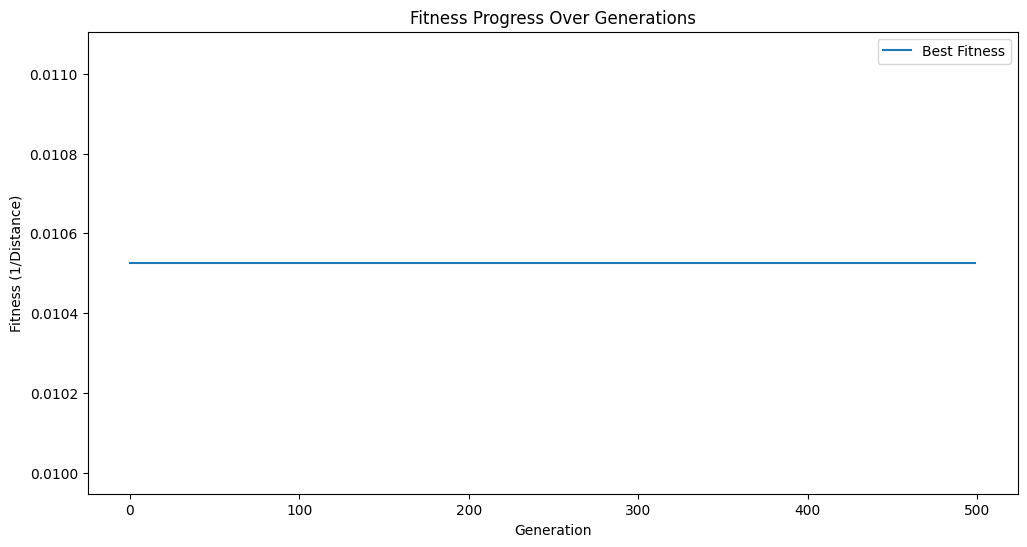

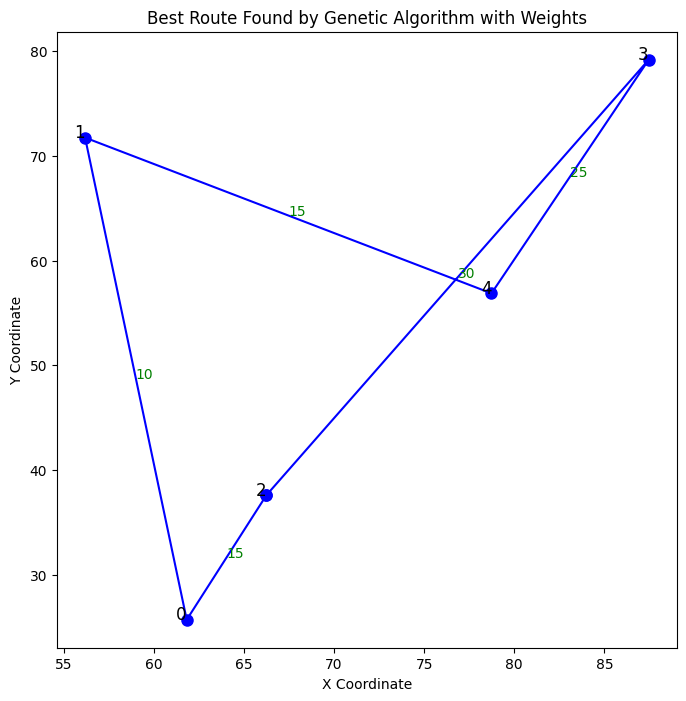

In [18]:
import matplotlib.pyplot as plt

# Plot the fitness progress over generations
plt.figure(figsize=(12, 6))
plt.plot(fitness_progress, label="Best Fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness (1/Distance)")
plt.title("Fitness Progress Over Generations")
plt.legend()
plt.show()

# Plot the best route with weights
def plot_route(route, city_coordinates, distance_matrix):
    route_coordinates = [city_coordinates[city] for city in route] + [city_coordinates[route[0]]]
    route_coordinates = np.array(route_coordinates)

    plt.figure(figsize=(8, 8))
    plt.plot(route_coordinates[:, 0], route_coordinates[:, 1], marker='o', markersize=8, linestyle='-', color='blue')
    plt.scatter(city_coordinates[:, 0], city_coordinates[:, 1], color='red')

    # Add labels for cities and weights for paths
    for i, (x, y) in enumerate(city_coordinates):
        plt.text(x, y, f'{i}', fontsize=12, ha='right')

    for i in range(len(route)):
        start, end = route[i], route[(i + 1) % len(route)]
        start_coords = city_coordinates[start]
        end_coords = city_coordinates[end]
        weight = distance_matrix[start][end]

        # Plot the distance weight on the path
        mid_x, mid_y = (start_coords[0] + end_coords[0]) / 2, (start_coords[1] + end_coords[1]) / 2
        plt.text(mid_x, mid_y, f'{weight}', fontsize=10, color='green')

    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title("Best Route Found by Genetic Algorithm with Weights")
    plt.show()

# Plot the best route with weights
plot_route(best_solution, city_coordinates, distance_matrix)
